*** WEATHER PREDICTION USING BAYESIAN MODEL ***

In [3]:
# IMPORTS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Open and observe the shape
df = pd.read_csv("weatherHistory.csv")
print(df.shape)

(96453, 12)


In [5]:
#observe the columns
print(df.columns)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


*** SORT THE DATABASE ***

In [6]:
# Step 1 : Analysing unless columns
df['Loud Cover'].unique()

array([0.])

* In the column named Loud Cover, the values are all 0 : we can remove this column

In [7]:
df = df.drop(['Loud Cover'], axis = 1)

In [8]:
print(len(df['Daily Summary'].unique()), df['Daily Summary'].unique()[0:5])

214 ['Partly cloudy throughout the day.' 'Mostly cloudy throughout the day.'
 'Foggy in the evening.' 'Foggy overnight and breezy in the morning.'
 'Overcast throughout the day.']


In [9]:
df = df.drop(['Daily Summary'], axis = 1)

* In the column Daily Summary, there is 214 values differents & its are complexes sentences : we also drop it

In [10]:
#Step 2 : Observe the lack of value in columns
(len(df)-df.count())*100/len(df)

Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Pressure (millibars)        0.000000
dtype: float64

In [11]:
df['Precip Type'].unique () #we notice the nan values are when it is not raining either snowing

array(['rain', 'snow', nan], dtype=object)

 * Only Precip Type has 0.53% of NA values, we drop the lines without value in this column

In [12]:
df = df.dropna()

In [13]:
#step 4 : encode columns to study correlation
print(df.select_dtypes(include=['object']).columns)

Index(['Formatted Date', 'Summary', 'Precip Type'], dtype='object')


In [14]:
df_corr = pd.get_dummies(df, columns = ['Summary', 'Precip Type'])

In [15]:
df_corr = df_corr.drop(['Formatted Date'], axis = 1)
df_corr.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_rain,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [16]:
corr = df_corr.corr()

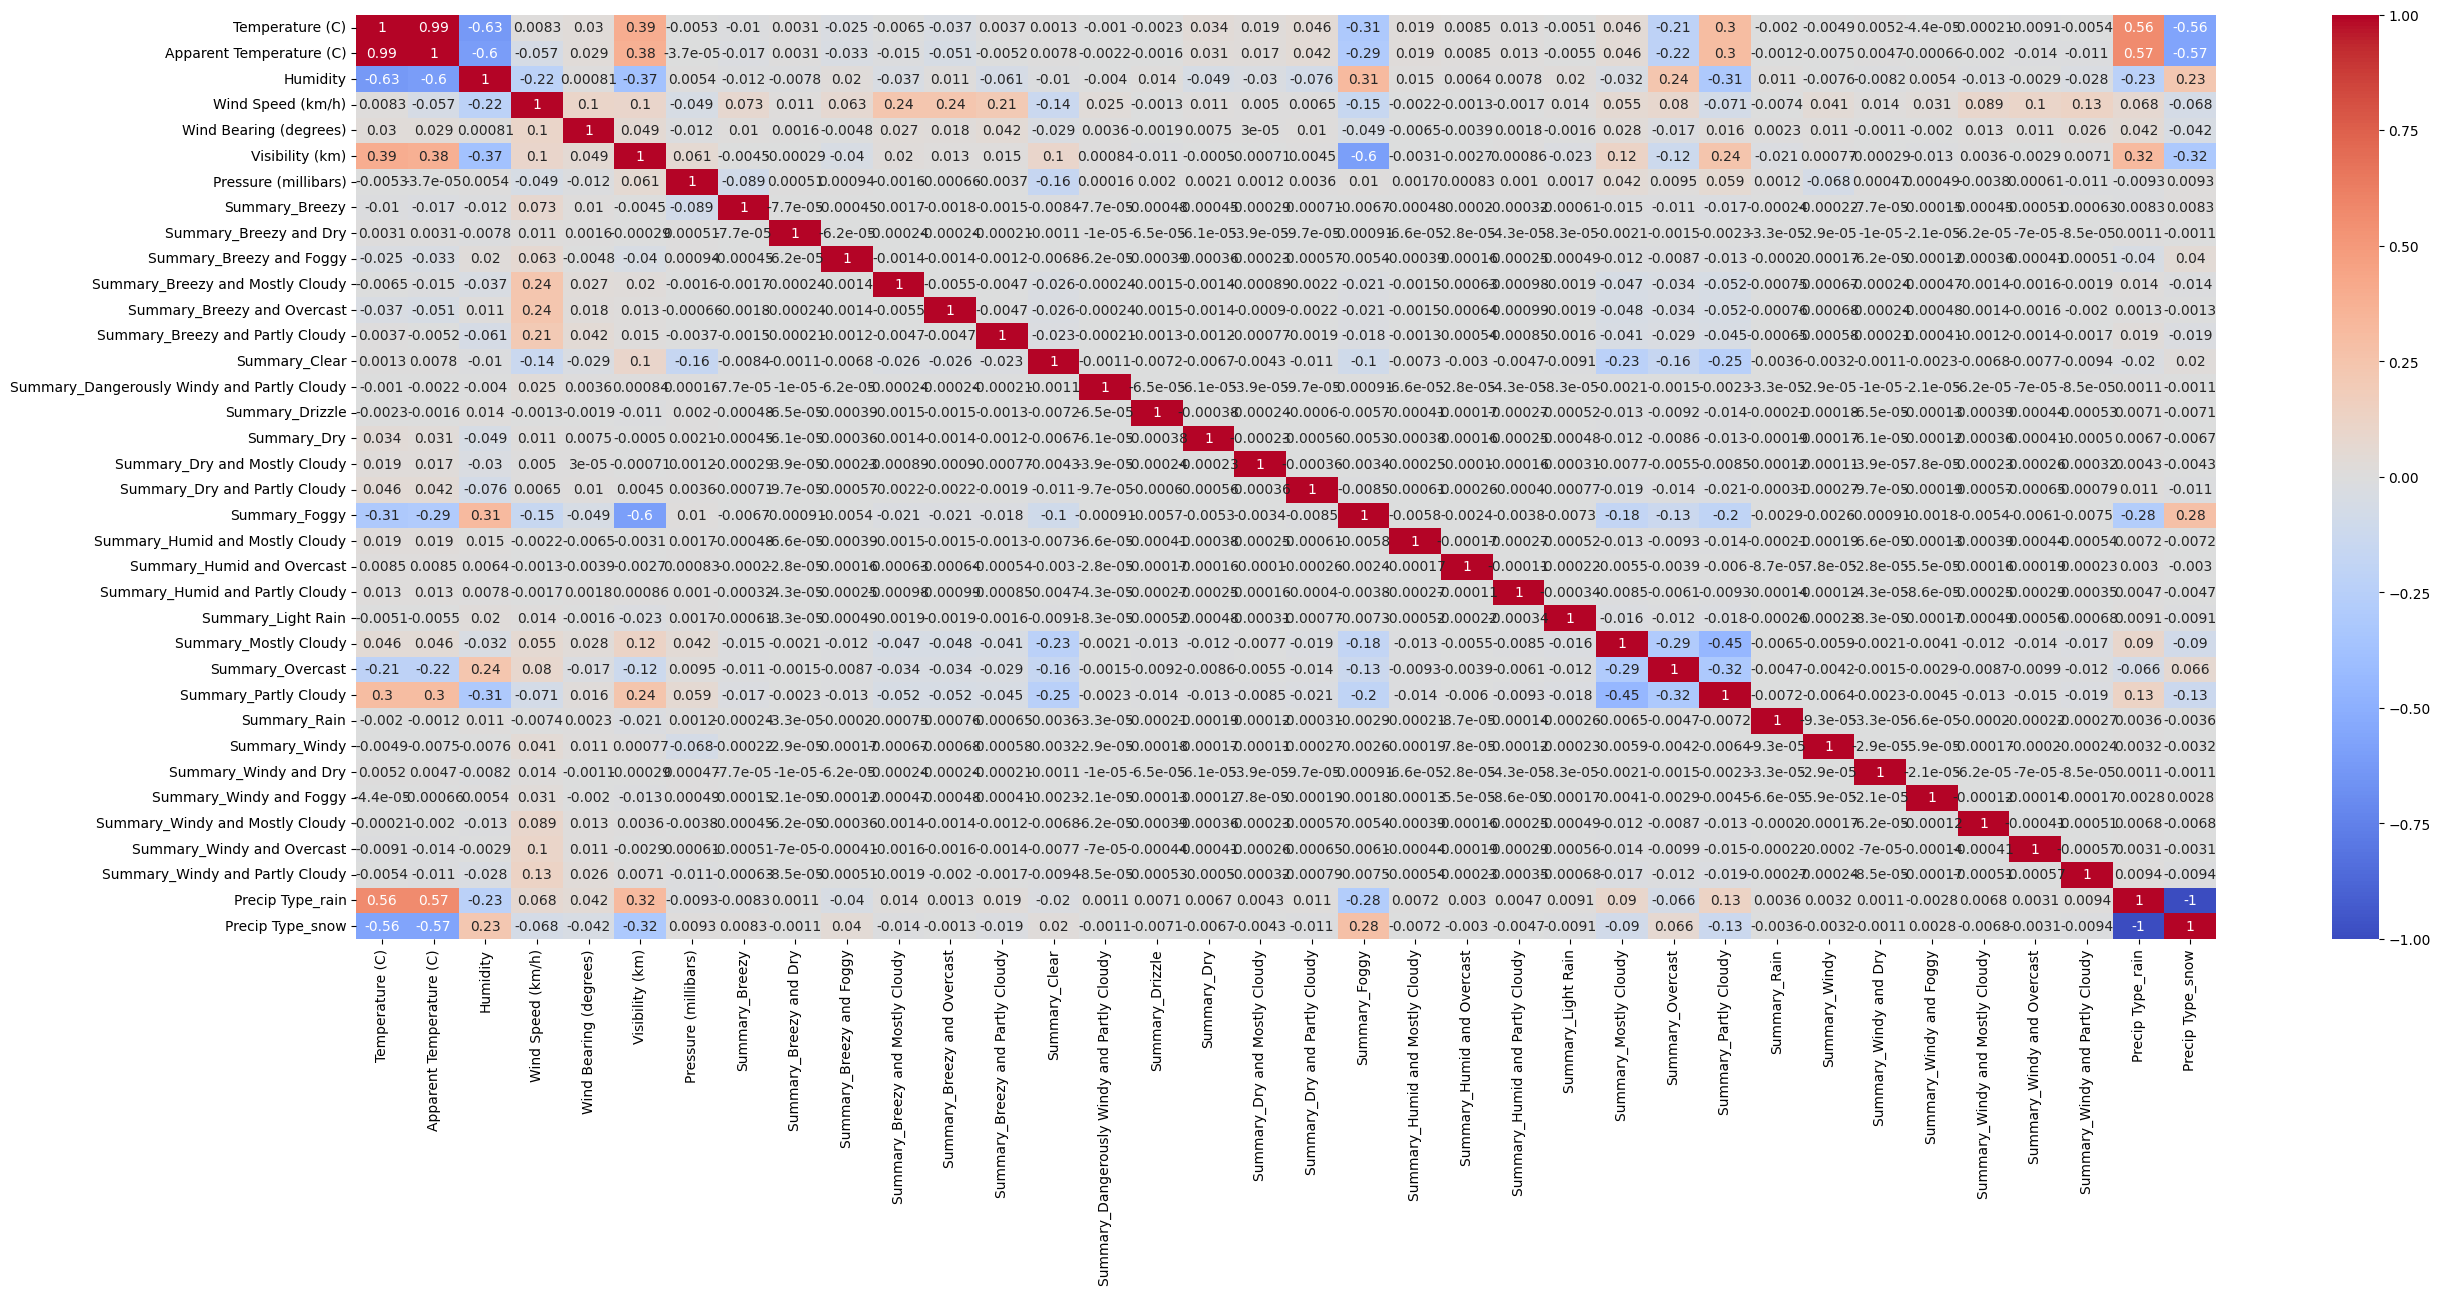

In [17]:
#plotting the matrix of correlation
plt.figure(figsize=(30,12))
sns.heatmap(corr, cmap = 'coolwarm', annot=True)
plt.show()

* we notice that temperature and apparent temperature are hightly correlated : we save temperature

In [18]:
df.drop(['Apparent Temperature (C)'], axis = 1)

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [19]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

In [20]:
df.select_dtypes(include=['object']).columns

Index(['Formatted Date', 'Summary', 'Precip Type'], dtype='object')

In [21]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

 *** MODELE SIMPLIFIÉ ***

In [22]:
X = df[['Formatted Date','Summary', 'Temperature (C)', 'Humidity']]
X['Summary_encoded'], _ = pd.factorize(X['Summary'])

X['Summary_encoded'].unique()

C:\Users\33695\AppData\Local\Temp\ipykernel_32672\2738955213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Summary_encoded'], _ = pd.factorize(X['Summary'])


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [23]:
X.columns

Index(['Formatted Date', 'Summary', 'Temperature (C)', 'Humidity',
       'Summary_encoded'],
      dtype='object')

In [27]:
X['Temperature (C)_discretized'] = pd.qcut(X['Temperature (C)'], q=4, labels=False)
X['Humidity_discretized'] = pd.qcut(X['Humidity'], q=4, labels=False)

C:\Users\33695\AppData\Local\Temp\ipykernel_32672\3565659136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Temperature (C)_discretized'] = pd.qcut(X['Temperature (C)'], q=4, labels=False)
C:\Users\33695\AppData\Local\Temp\ipykernel_32672\3565659136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Humidity_discretized'] = pd.qcut(X['Humidity'], q=4, labels=False)


In [28]:
X.head()

,Formatted Date,Summary,Temperature (C),Humidity,Summary_encoded,Temperature (C)_discretized,Humidité_discretized,Humidity_discretized
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,9.472222,0.89,0,1,2,2
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,9.355556,0.86,0,1,2,2
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,0.89,1,1,2,2
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,8.288889,0.83,0,1,2,2
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,8.755556,0.83,1,1,2,2


In [37]:
from pgmpy.models import DynamicBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import pandas as pd

num_time_steps = 5

model = DynamicBayesianNetwork()

for t in range(num_time_steps):
    # Créez des nœuds pour 'Summary_encode', 'Temperature_discretized', et 'Humidity_discretized' à chaque instant t
    model.add_node(('Summary_encode', t))
    model.add_node(('Temperature_discretized', t))
    model.add_node(('Humidity_discretized', t))

    if t > 0:
        # Créez des arêtes entre les nœuds à l'instant t et t-1
        model.add_edge(('Summary_encode', t - 1), ('Summary_encode', t))
        model.add_edge(('Temperature_discretized', t - 1), ('Temperature_discretized', t))
        model.add_edge(('Humidity_discretized', t - 1), ('Humidity_discretized', t))

# Définissez ensuite les CPDs pour chaque nœud à chaque instant
for t in range(num_time_steps):
    cpd_summary_encode = TabularCPD(variable=('Summary_encode', t), variable_card=4, values=[[0.25], [0.25], [0.25], [0.25]])
    cpd_temperature_discretized = TabularCPD(variable=('Temperature_discretized', t), variable_card=4, values=[[0.25], [0.25], [0.25], [0.25]])
    cpd_humidity_discretized = TabularCPD(variable=('Humidity_discretized', t), variable_card=4, values=[[0.25], [0.25], [0.25], [0.25]])
    
    # Ajoutez les CPDs au modèle
    model.add_cpds(cpd_summary_encode, cpd_temperature_discretized, cpd_humidity_discretized)

# Vérifiez la validité du modèle
model.check_model()


ValueError: ('CPD defined on variable not in the model', <TabularCPD representing P(('Summary_encode', 2):4) at 0x1c2c4a2d610>)